<a href="https://colab.research.google.com/github/soyHouston256/CodeJam/blob/master/modulo4_analisis_exploratorio/Correlations_and_associations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://posgrado.utec.edu.pe/sites/default/files/2023-08/Testimonial-home-2.jpg" alt="HTML5 Icon" width="900" height="250" >

# **Laboratorio: Laboratorio: Correlaciones y Asociaciones en Desempeño Estudiantil**

---

## **Objetivo general**

Aplicar medidas de correlación y asociación entre variables numéricas y categóricas en un dataset real de rendimiento académico, utilizando tanto herramientas estadísticas como visualización avanzada.

## **1. Introducción**

Este laboratorio busca explorar relaciones entre variables numéricas como math score, reading score y writing score, así como entre variables categóricas como gender, parental education, y test preparation course. Aprenderemos a elegir correctamente entre Pearson, Spearman, Kendall, Chi-cuadrado, Cramér’s V y Phi, según el tipo de variables involucradas.

## **2. Dataset**

Usaremos el dataset:

Students Performance in Exams

Fuente: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams




Este dataset contiene registros de exámenes de estudiantes en tres materias, junto con información demográfica y socioeconómica. Las columnas son:


- gender: sexo del estudiante

- race/ethnicity: grupo étnico

- parental level of education: educación del padre

- lunch: tipo de almuerzo

- test preparation course: curso de preparación

- math score, reading score, writing score: puntajes obtenidos

## **3. Carga y exploración inicial**



In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr, kendalltau, chi2_contingency
import numpy as np

df = pd.read_csv("StudentsPerformance.csv")
df.columns = df.columns.str.replace(" ", "_")
df.head()


,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## **4. Correlación entre variables numéricas**


Pearson mide relaciones lineales.

Spearman evalúa relaciones monótonas basadas en rangos.

Kendall mide la concordancia de pares (orden total).

**Correlaciones**

In [3]:
num_cols = ['math_score', 'reading_score', 'writing_score']
corr_methods = ['pearson', 'spearman', 'kendall']

for method in corr_methods:
    print(f"\nMatriz de correlación - {method.title()}:")
    display(df[num_cols].corr(method=method).round(3))



Matriz de correlación - Pearson:


,math_score,reading_score,writing_score
math_score,1.000,0.818,0.803
reading_score,0.818,1.000,0.955
writing_score,0.803,0.955,1.000



Matriz de correlación - Spearman:


,math_score,reading_score,writing_score
math_score,1.000,0.804,0.778
reading_score,0.804,1.000,0.949
writing_score,0.778,0.949,1.000



Matriz de correlación - Kendall:


,math_score,reading_score,writing_score
math_score,1.000,0.617,0.591
reading_score,0.617,1.000,0.820
writing_score,0.591,0.820,1.000


**Visualización**

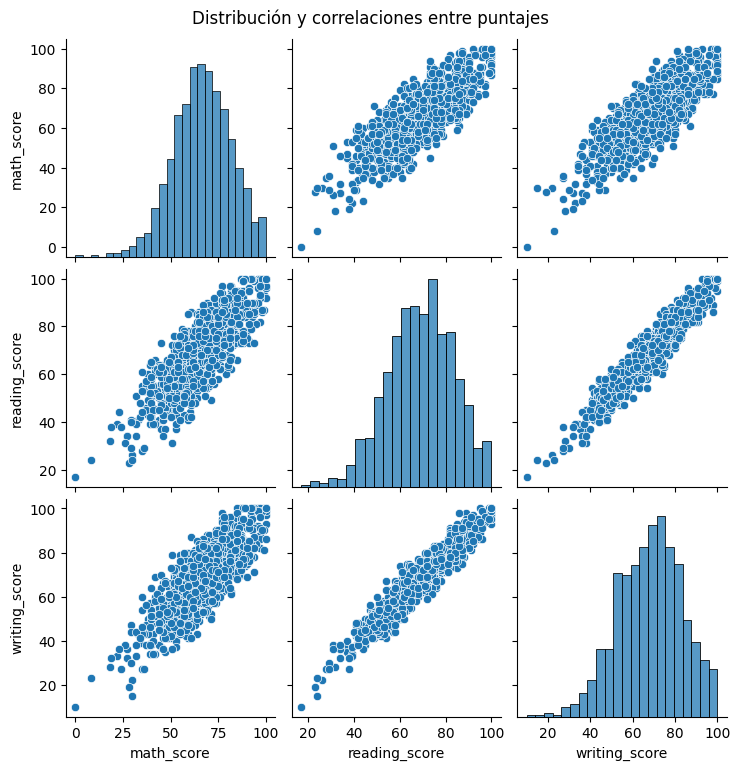

In [4]:
sns.pairplot(df[num_cols])
plt.suptitle("Distribución y correlaciones entre puntajes", y=1.02)
plt.show()


## **5. Asociación entre variables categóricas**


Usamos Chi-cuadrado para evaluar independencia entre categorías.

Para la fuerza, aplicamos Cramér’s V.

Si es 2x2, podemos usar Phi.

**Implementación de Cramér’s V y Phi**

In [5]:
from scipy.stats import chi2_contingency

def cramers_v(conf_matrix):
    chi2 = chi2_contingency(conf_matrix)[0]
    n = conf_matrix.sum().sum()
    r, k = conf_matrix.shape
    return np.sqrt(chi2 / (n * (min(k-1, r-1))))

def phi(conf_matrix):
    chi2 = chi2_contingency(conf_matrix)[0]
    n = conf_matrix.sum().sum()
    return np.sqrt(chi2 / n)


In [8]:
pd.crosstab(df.gender, df.test_preparation_course)

test_preparation_course,completed,none
gender,,
female,184,334
male,174,308


In [6]:
# Chi-cuadrado + Cramér’s V entre género y curso de preparación
ct = pd.crosstab(df.gender, df.test_preparation_course)
chi2, p, dof, exp = chi2_contingency(ct)

print(f"Chi² = {chi2:.2f}, p = {p:.4f}")
print(f"Cramér’s V = {cramers_v(ct):.3f}")
print(f"Phi = {phi(ct):.3f}")


Chi² = 0.02, p = 0.9008
Cramér’s V = 0.004


## **6. Comparaciones mixtas (categórica vs. numérica)**


**Visualización de diferencias**

In [ ]:
sns.boxplot(data=df, x='gender', y='math_score')
plt.title("Math score por género")
plt.show()


**ANOVA (opcional)**

In [ ]:
from scipy.stats import f_oneway

grupo_h = df[df.gender == 'male']['math_score']
grupo_m = df[df.gender == 'female']['math_score']

f_stat, p = f_oneway(grupo_h, grupo_m)
print(f"ANOVA: F = {f_stat:.2f}, p = {p:.4f}")


# **7. Visualización integrada**


**Heatmap de correlación numérica**

In [ ]:
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Matriz de correlación numérica")
plt.show()


**Heatmap de Cramér’s V entre categóricas**

In [ ]:
cat_cols = ['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']
mat = pd.DataFrame(index=cat_cols, columns=cat_cols)

for i in cat_cols:
    for j in cat_cols:
        mat.loc[i,j] = cramers_v(pd.crosstab(df[i], df[j]))

sns.heatmap(mat.astype(float), annot=True, cmap='YlGnBu')
plt.title("Cramér’s V entre variables categóricas")
plt.show()


## **8. Actividades finales**


**8.1 Comparación entre métodos de correlación**

- ¿Cuál da valores más altos entre Spearman y Kendall?

- ¿Qué pares de puntajes están más correlacionados?



**8.2 Asociación significativa**

- ¿Qué variables categóricas muestran relaciones más fuertes según Cramér’s V?



**8.3 Construcción de hipótesis**

Elige una variable categórica (e.g. lunch) y plantea una hipótesis con respecto a su impacto en los puntajes. Contrástala con boxplots.

## **9. Conclusión**

Este laboratorio integró herramientas estadísticas y visuales para analizar relaciones entre variables. Las técnicas no paramétricas como Spearman, Kendall o Cramér’s V resultan útiles cuando los supuestos clásicos no se cumplen. Saber elegir la métrica correcta es clave para extraer insights confiables en el proceso de data discovery.

---

# Gracias por completar este laboratorio!

---
